In [1]:
%matplotlib inline

In [2]:
import numpy as np
import cmath
from matplotlib import pyplot as plt
import IPython
import soundfile as sf
from scipy.signal import spectrogram, lfilter, freqz, tf2zpk

In [3]:
#Reading a file

In [4]:
tone_on, tone_on_r = sf.read('../audio/maskon_tone.wav')
tone_on = tone_on[:16000]
tone_off, tone_off_r = sf.read('../audio/maskoff_tone.wav')
tone_off = tone_off[:16000]
tone_ton = np.arange(tone_on.size) / tone_on_r
tone_toff = np.arange(tone_off.size) / tone_off_r

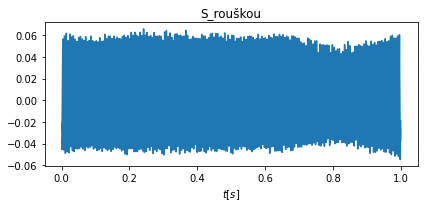

In [5]:
plt.figure(figsize=(6,3))
plt.plot(tone_ton, tone_on)

plt.gca().set_xlabel('$t[s]$')
plt.gca().set_title('S_rouškou')

plt.tight_layout()

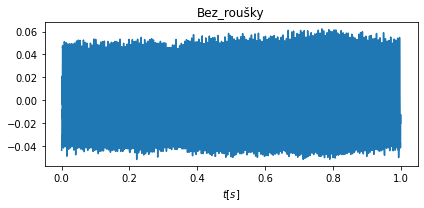

In [6]:
plt.figure(figsize=(6,3))
plt.plot(tone_toff, tone_off)

plt.gca().set_xlabel('$t[s]$')
plt.gca().set_title('Bez_roušky')

plt.tight_layout()

In [7]:
mid = np.mean(tone_on)
mask_midon = [prom - mid for prom in tone_on]
mask_abson = np.abs(mask_midon).max()
mask_midon = [prom / mask_abson for prom in  mask_midon]

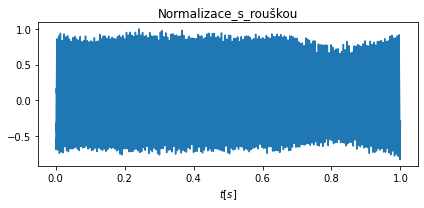

In [8]:
plt.figure(figsize=(6,3))
plt.plot(tone_ton, mask_midon)

plt.gca().set_xlabel('$t[s]$')
plt.gca().set_title('Normalizace_s_rouškou')

plt.tight_layout()

In [9]:
mid = np.mean(tone_off)
mask_midoff = [prom - mid for prom in tone_off]
mask_absoff = np.abs(mask_midoff).max()
mask_midoff = [prom / mask_absoff for prom in  mask_midoff]

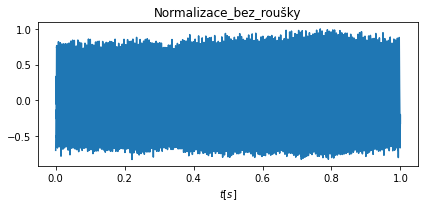

In [10]:
plt.figure(figsize=(6,3))
plt.plot(tone_toff, mask_midoff)

plt.gca().set_xlabel('$t[s]$')
plt.gca().set_title('Normalizace_bez_roušky')

plt.tight_layout()

In [11]:
#Create frame

In [12]:
maskon_frame = []
for v in range(99):
    maskon_frame.append(np.array(tone_on[int(v * 0.01 *16000) : int((v + 2) * 0.01 *16000)]))

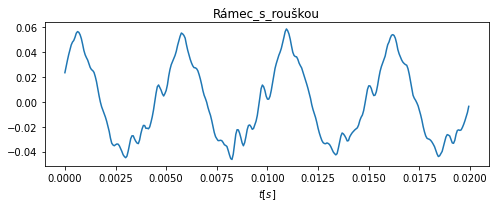

In [13]:
plt.figure(figsize=(7,3))
plt.plot(np.arange(320) / tone_on_r, maskon_frame[6])
plt.gca().set_xlabel('$t[s]$')
plt.gca().set_title('Rámec_s_rouškou')

plt.tight_layout()

In [14]:
maskoff_frame = []
for v in range(99):
    maskoff_frame.append(np.array(tone_off[int(v * 0.01 *16000) : int((v + 2) * 0.01 *16000)]))          

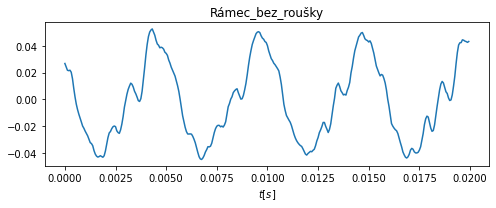

In [15]:
plt.figure(figsize=(7,3))
plt.plot(np.arange(320) /tone_off_r, maskoff_frame[6])

plt.gca().set_xlabel('$t[s]$')
plt.gca().set_title('Rámec_bez_roušky')

plt.tight_layout()

In [16]:
tone_on_clip = []
clip_mid = np.abs(np.max(tone_on)) * 0.65

for index in range(16000):
    if tone_on[index] > clip_mid:
        tone_on_clip.append(1)
    elif tone_on[index] < -clip_mid:
        tone_on_clip.append(-1)
    else :
        tone_on_clip.append(0)
        
on_frame = []
for value in range(99):
    on_frame.append(np.array(tone_on_clip[int(value * 0.01 *16000) : int((value + 2) * 0.01 *16000)])) 

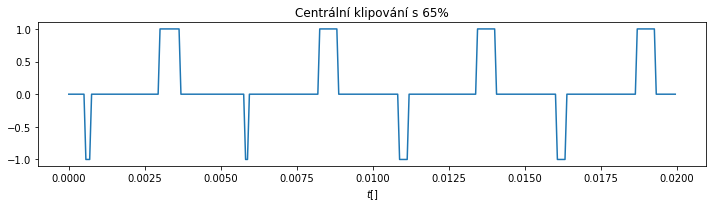

In [17]:
plt.figure(figsize=(10,3))
plt.plot(np.arange(320) / tone_on_r, on_frame[0])
plt.gca().set_xlabel('$t[]$')
plt.gca().set_title('Centrální klipování s 65%')

plt.tight_layout()

In [18]:
tone_off_clip = []
clip_mid  = np.abs(np.max(tone_off)) * 0.65
for index in range(16000):
    if tone_off[index] > clip_mid:
        tone_off_clip.append(1)
    elif tone_off[index] < -clip_mid:
        tone_off_clip.append(-1)
    else :
        tone_off_clip.append(0)
        
off_frame = []
for value in range(99):
    off_frame.append(np.array(tone_off_clip[int(value * 0.01 *16000) : int((value + 2) * 0.01 *16000)]))         

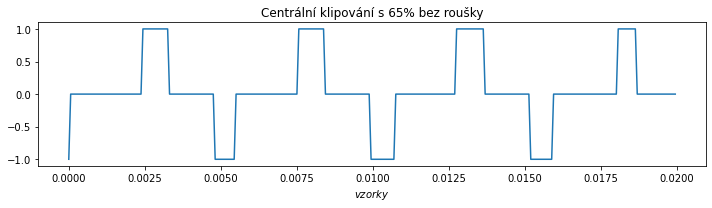

In [19]:
plt.figure(figsize=(10,3))
plt.plot(np.arange(320) / tone_off_r, off_frame[50])

plt.gca().set_xlabel('$vzorky$')
plt.gca().set_title('Centrální klipování s 65% bez roušky')

plt.tight_layout()

In [20]:
tone_auto_on = []

for autocor in range(99):
    tone_auto_coron = []
    for lag in range(10, 320):
        step = 0
        for suma in range(320-1-lag):
            s = on_frame[autocor][suma] * on_frame[autocor][suma+lag]
            step = step + s
        tone_auto_coron.append(step)
    tone_auto_on.append(np.array(tone_auto_coron))

array_lag_on = []
for array in tone_auto_on:
    array_lag_on.append(16000/array.argmax())

In [21]:
tone_auto_off = []

for autocor in range(99):
    tone_auto_coroff = []
    for lag in range(10, 320):
        step = 0
        for suma in range(320-1-lag):
            s = off_frame[autocor][suma] * off_frame[autocor][suma+lag]
            step = step + s
        tone_auto_coroff.append(step)
    tone_auto_off.append(np.array(tone_auto_coroff))

array_lag_off = []
for array in tone_auto_off:
    array_lag_off.append(16000/array.argmax())

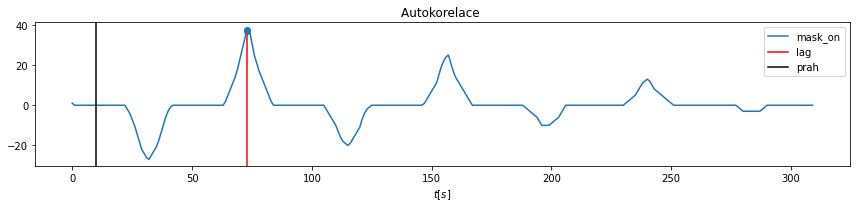

In [22]:
plt.figure(figsize=(12,3))
plt.plot(tone_auto_on[0], label='mask_on')

plt.gca().set_xlabel('$t[s]$')
plt.gca().set_title('Autokorelace ')

plt.axvline(x=(tone_auto_on[0][10:].argmax()+10), color = 'red', ymax=0.93, label='lag')
plt.axvline((tone_auto_on[0][10:].argmax()+10), ymax=0.94, ymin=0.95,  marker='o')
plt.axvline(x=10, color = 'black', label='prah')
plt.legend()
plt.tight_layout()

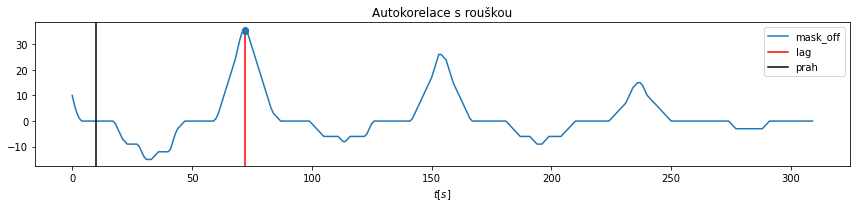

In [23]:
plt.figure(figsize=(12,3))
plt.plot(tone_auto_off[0], label='mask_off')

plt.gca().set_xlabel('$t[s]$')
plt.gca().set_title('Autokorelace s rouškou')

plt.axvline(x=(tone_auto_off[0][10:].argmax()+10), color = 'red', ymax=0.94,  label='lag')
plt.axvline((tone_auto_off[0][10:].argmax()+10),ymax=0.94,ymin=0.95,  marker='o')
plt.axvline(x=10, color = 'black', label='prah')
plt.legend()

plt.tight_layout()

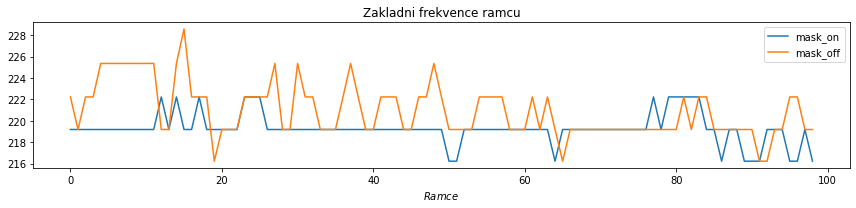

In [24]:
plt.figure(figsize=(12,3))
plt.plot(array_lag_on, label='mask_on')
plt.plot(array_lag_off, label='mask_off')

plt.gca().set_xlabel('$Ramce$')
plt.gca().set_title('Zakladni frekvence ramcu')
plt.legend()

plt.tight_layout()

In [25]:
print(np.mean(array_lag_on),np.var(array_lag_on))
print(np.mean(array_lag_off),np.var(array_lag_off))

219.2478904807672 2.004500165125178
220.91723996669654 6.128244195362446


In [26]:
#5

In [27]:
tone_on_dfft = []
for value in maskon_frame:
    tone_on_dfft.append(np.fft.fft(value,1024))

    
tone_off_dfft = []
for value in maskoff_frame:
    tone_off_dfft.append(np.fft.fft(value,1024))

In [28]:
def dft_func(mask_frame):
    tone_dft = []
    N=1024

    for value in mask_frame:
        tone_mask_dft = []
        for k in range(1024):
            dft = 0
            step = 0
            for suma in range(320):
                dft = value[suma] * cmath.exp(-(cmath.pi*2j*k*suma/N))
                step = step + dft
            tone_mask_dft.append(step)
        tone_dft.append(np.array(tone_mask_dft))
    return tone_dft

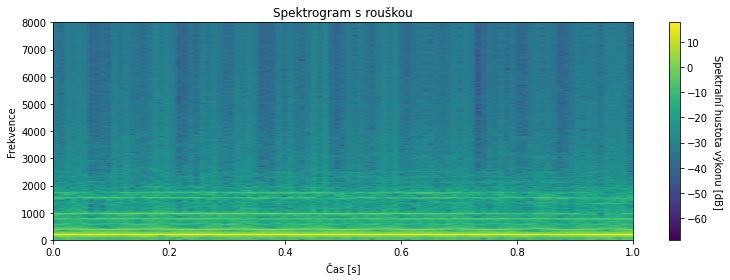

In [29]:
tone_on_dft = np.abs(tone_on_dfft)**2
dft_geton = 10 * np.log10(tone_on_dft)
plt.figure(figsize = (11,4))
plt.imshow(dft_geton[:,:512].T, aspect = 'auto', extent = [0, 1, 0, 8000], origin = 'lower')
plt.gca().set_title('Spektrogram s rouškou')
plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence')

pcbar = plt.colorbar()
pcbar.set_label('Spektralní hustota výkonu [dB]', rotation=270, labelpad=15)
plt.tight_layout()


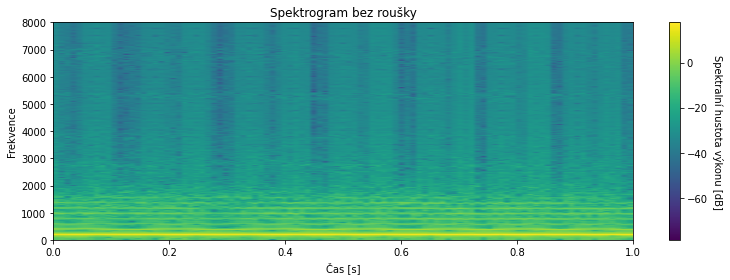

In [30]:
tone_off_dft = np.abs(tone_off_dfft)**2
dft_getoff = 10 * np.log10(tone_off_dft)
plt.figure(figsize = (11,4))
plt.imshow(dft_getoff[:,:512].T, aspect = 'auto', extent = [0, 1, 0, 8000], origin ='lower')
plt.gca().set_title('Spektrogram bez roušky')
plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence')

pcbar = plt.colorbar()
pcbar.set_label('Spektralní hustota výkonu [dB]', rotation=270, labelpad=15)
plt.tight_layout()

In [31]:
#6

In [32]:
frekv_char = np.empty(512)
char_filt = []
for k in range(99):
    diff = tone_on_dfft[k][:512]/tone_off_dfft[k][:512]
    char_filt.append(np.array(np.abs(diff)))

mod = np.abs(char_filt)
frekv_char = np.mean(mod, axis=0)
frekv_charr = 20 * np.log10(np.abs(frekv_char+1e-20))

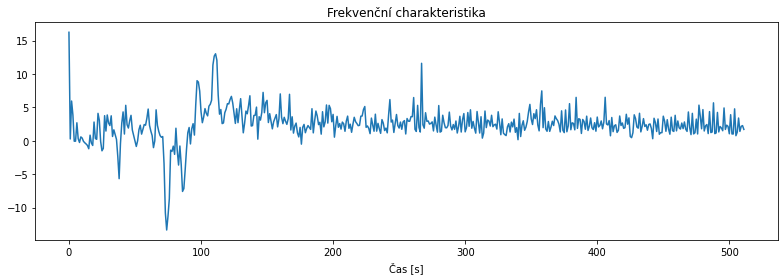

In [33]:
plt.figure(figsize = (11,4))
plt.gca().set_title('Frekvenční charakteristika')
plt.gca().set_xlabel('Čas [s]')

plt.plot(frekv_charr)
plt.tight_layout()

In [34]:
#7

In [35]:
frekv_idft = (np.fft.ifft(frekv_char))
frekv_idftt = 20 * np.log10(np.abs(frekv_idft+1e-20))

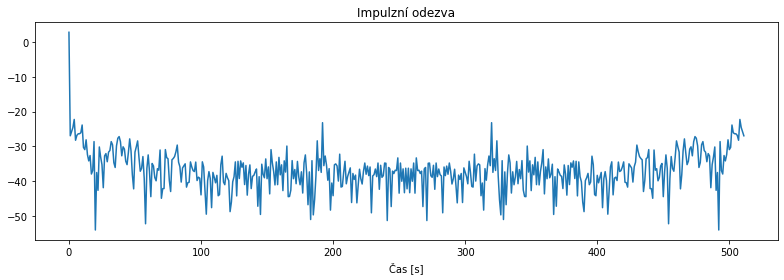

In [36]:
plt.figure(figsize = (11,4))
plt.gca().set_title('Impulzní odezva')
plt.gca().set_xlabel('Čas [s]')

plt.plot(frekv_idftt)
plt.tight_layout()

In [37]:
def idft(mask_frame):
    tone_idft  = []
    N=512
    for k in range(512):
        dft = 0
        step = 0
        for suma in range(512):
            dft = (mask_frame[suma] * cmath.exp(cmath.pi*2j*k*suma/N))/512
            step = step + dft
        tone_idft.append(step)
    tone_idft.append(np.array(tone_idft))
    return tone_idft

In [38]:
#8

In [39]:
sent_on, sent_on_r = sf.read('../audio/maskon_sentence.wav')
sent_off, sent_off_r = sf.read('../audio/maskoff_sentence.wav')
sent_ton = np.arange(sent_on.size) / sent_on_r
sent_toff = np.arange(sent_off.size) / sent_off_r

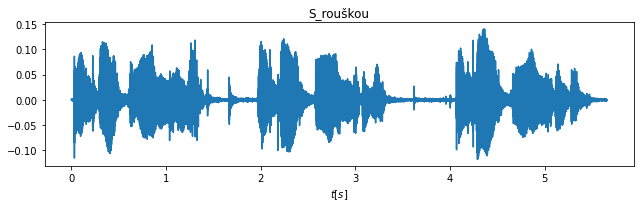

In [40]:
plt.figure(figsize=(9,3))
plt.plot(sent_ton, sent_on)

plt.gca().set_xlabel('$t[s]$')
plt.gca().set_title('S_rouškou')

plt.tight_layout()

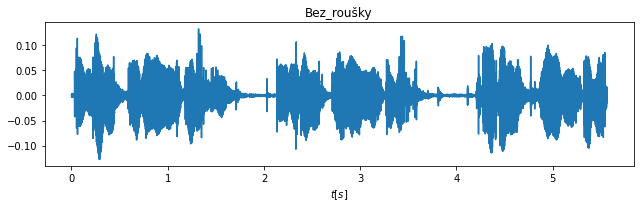

In [41]:
plt.figure(figsize=(9,3))
plt.plot(sent_toff, sent_off)

plt.gca().set_xlabel('$t[s]$')
plt.gca().set_title('Bez_roušky')

plt.tight_layout()

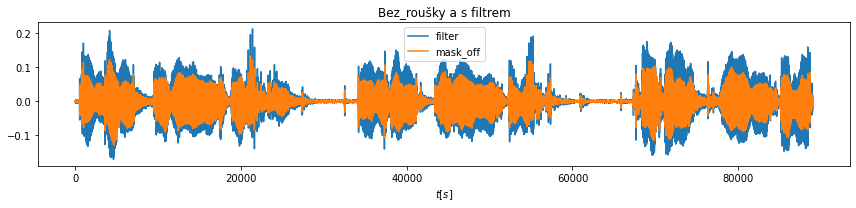

In [42]:
filter_sent= lfilter(np.abs(frekv_idft),1,sent_off)

plt.figure(figsize=(12,3))
plt.plot(filter_sent, label='filter')
plt.plot(sent_off, label='mask_off')
plt.gca().set_xlabel('$t[s]$')
plt.gca().set_title('Bez_roušky a s filtrem')
plt.legend()

plt.tight_layout()

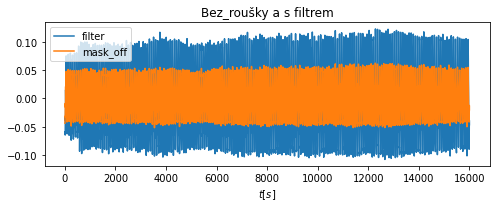

In [43]:
filter_tone= lfilter(np.abs(frekv_idft),1,tone_off)

plt.figure(figsize=(7,3))
plt.plot(filter_tone, label='filter')
plt.plot(tone_off, label='mask_off')

plt.gca().set_xlabel('$t[s]$')
plt.gca().set_title('Bez_roušky a s filtrem')
plt.legend()

plt.tight_layout()

In [44]:
IPython.display.display(IPython.display.Audio(filter_sent, rate=16000))
IPython.display.display(IPython.display.Audio(sent_off, rate=16000))
IPython.display.display(IPython.display.Audio(sent_on, rate=16000))

In [45]:
IPython.display.display(IPython.display.Audio(filter_tone, rate=16000))
IPython.display.display(IPython.display.Audio(tone_off, rate=16000))
IPython.display.display(IPython.display.Audio(tone_on, rate=16000))